## Lesson 3

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
planets[['method', 'number']].groupby('method').sum()

,number
method,
Astrometry,2
Eclipse Timing Variations,15
Imaging,50
Microlensing,27
Orbital Brightness Modulation,5
Pulsar Timing,11
Pulsation Timing Variations,1
Radial Velocity,952
Transit,776


In [4]:
df = pd.DataFrame({'key': list("ABCABC"),"data":range(6)},columns=['key','data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [5]:
list(df.groupby("key"))


[('A',
    key  data
  0   A     0
  3   A     3),
 ('B',
    key  data
  1   B     1
  4   B     4),
 ('C',
    key  data
  2   C     2
  5   C     5)]

In [6]:
df.groupby('key').mean()

,data
key,
A,1.5
B,2.5
C,3.5


In [7]:
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [8]:
myfunc = lambda x: x.sum()/10

In [9]:
df.groupby('key').agg(myfunc)

,data
key,
A,0.3
B,0.5
C,0.7


In [10]:
def cal(x):
    return x.mean()-1

In [11]:
df.groupby('key').aggregate(['sum',myfunc,'mean',cal])

data                     
     sum <lambda_0> mean  cal
key                          
A      3        0.3  1.5  0.5
B      5        0.5  2.5  1.5
C      7        0.7  3.5  2.5

In [12]:
df1 = pd.DataFrame({'key': list("ABCABC"),"data1":range(6),'data2':range(6,12)},columns=['key','data1','data2'])


In [13]:
df1

,key,data1,data2
0,A,0,6
1,B,1,7
2,C,2,8
3,A,3,9
4,B,4,10
5,C,5,11


In [14]:
df1.groupby('key').agg({'data1':['sum',myfunc],'data2':['mean',cal]})

data1            data2     
      sum <lambda_0>  mean  cal
key                            
A       3        0.3   7.5  6.5
B       5        0.5   8.5  7.5
C       7        0.7   9.5  8.5

In [15]:
df.groupby('key').filter(lambda x: x['data'].sum()>=5)

,key,data
1,B,1
2,C,2
4,B,4
5,C,5


In [16]:
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [17]:
import seaborn as sns

In [18]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [19]:
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [22]:
%timeit planets.groupby('method')['number'].sum()

490 μs ± 103 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [23]:
%timeit planets[['method','number']].groupby('method').sum()

1.16 ms ± 207 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [24]:
#3)
planets.groupby('method')['number'].sum()

method
Astrometry                         2
Eclipse Timing Variations         15
Imaging                           50
Microlensing                      27
Orbital Brightness Modulation      5
Pulsar Timing                     11
Pulsation Timing Variations        1
Radial Velocity                  952
Transit                          776
Transit Timing Variations          9
Name: number, dtype: int64

In [25]:
planets.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [26]:
#4)
planets.groupby('method')['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [29]:
planets_mass = planets.dropna(subset=['mass'])

In [30]:
planets_mass.groupby('method').agg({'number':'sum','mass':"mean"})

,number,mass
method,,
Eclipse Timing Variations,2,5.125000
Radial Velocity,878,2.630699
Transit,1,1.470000


In [31]:
planets.groupby('method').filter(lambda x: x['number'].sum()>20)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [33]:
ind_tuple = pd.MultiIndex.from_tuples([(1,"a"),(2,"a"),(3,"b"),(4,"c")])
ind_tuple

MultiIndex([(1, 'a'),
            (2, 'a'),
            (3, 'b'),
            (4, 'c')],
           )

In [34]:
pd.MultiIndex.from_product([[1,2,3],['a','b']])

MultiIndex([(1, 'a'),
            (1, 'b'),
            (2, 'a'),
            (2, 'b'),
            (3, 'a'),
            (3, 'b')],
           )

In [36]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]

populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
under18= [9267089, 9284094, 4687374, 4318033,5906301, 6879014]
ind = pd.MultiIndex.from_tuples(index, names=('states','years'))

pop = pd.DataFrame({'pop':populations, 'under_18':under18}, index=ind)

In [37]:
pop

pop  under_18
states     years                    
California 2000   33871648   9267089
           2010   37253956   9284094
New York   2000   18976457   4687374
           2010   19378102   4318033
Texas      2000   20851820   5906301
           2010   25145561   6879014

In [38]:
pop['pop']

states      years
California  2000     33871648
            2010     37253956
New York    2000     18976457
            2010     19378102
Texas       2000     20851820
            2010     25145561
Name: pop, dtype: int64

In [ ]:
pop.loc['New York'] #  

,pop,under_18
years,,
2000,18976457,4687374
2010,19378102,4318033


In [40]:
ind 

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           names=['states', 'years'])

In [41]:
pop.loc[('California',2010)]

pop         37253956
under_18     9284094
Name: (California, 2010), dtype: int64

In [42]:
pop.xs(2010,level='years')

,pop,under_18
states,,
California,37253956,9284094
New York,19378102,4318033
Texas,25145561,6879014


In [43]:
pop 

pop  under_18
states     years                    
California 2000   33871648   9267089
           2010   37253956   9284094
New York   2000   18976457   4687374
           2010   19378102   4318033
Texas      2000   20851820   5906301
           2010   25145561   6879014

In [ ]:
pop.stack()

states      years          
California  2000   pop         33871648
                   under_18     9267089
            2010   pop         37253956
                   under_18     9284094
New York    2000   pop         18976457
                   under_18     4687374
            2010   pop         19378102
                   under_18     4318033
Texas       2000   pop         20851820
                   under_18     5906301
            2010   pop         25145561
                   under_18     6879014
dtype: int64

In [46]:
type(pop.stack())

pandas.core.series.Series

In [47]:
pop

pop  under_18
states     years                    
California 2000   33871648   9267089
           2010   37253956   9284094
New York   2000   18976457   4687374
           2010   19378102   4318033
Texas      2000   20851820   5906301
           2010   25145561   6879014

In [48]:
pop.unstack()

pop           under_18         
years           2000      2010     2000     2010
states                                          
California  33871648  37253956  9267089  9284094
New York    18976457  19378102  4687374  4318033
Texas       20851820  25145561  5906301  6879014

In [49]:
type(pop.unstack())

pandas.core.frame.DataFrame

In [50]:
pop.unstack().unstack()

          years  states    
pop       2000   California    33871648
                 New York      18976457
                 Texas         20851820
          2010   California    37253956
                 New York      19378102
                 Texas         25145561
under_18  2000   California     9267089
                 New York       4687374
                 Texas          5906301
          2010   California     9284094
                 New York       4318033
                 Texas          6879014
dtype: int64

In [51]:
type(pop.unstack().unstack())

pandas.core.series.Series

In [52]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
titanic.groupby(['sex','class'])['survived'].mean().unstack()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9988\2728885616.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex','class'])['survived'].mean().unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
titanic.pivot_table(index='sex', 
                    columns='class', 
                    values='survived')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9988\95850277.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(index='sex', columns='class', values='survived')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [60]:
titanic.pivot_table(index='sex', 
                    columns='class', 
                    values='survived',
                    aggfunc='sum',
                    margins=True,
                    margins_name='total_survived')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9988\2691121942.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(index='sex',


class,First,Second,Third,total_survived
sex,,,,
female,91,70,72,233
male,45,17,47,109
total_survived,136,87,119,342


In [3]:
url = 'https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv'
births = pd.read_csv(url)
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
df = pd.pivot_table(data = births,
                    index='year',
                    columns='gender',
                    values='births',
                    aggfunc='sum')
df.head() 

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023


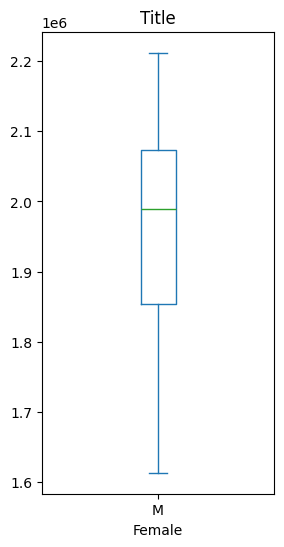

In [10]:
df.plot(kind='box',
        x = 'F',xlabel='Female', 
        title="Title",
        figsize=(3,6));

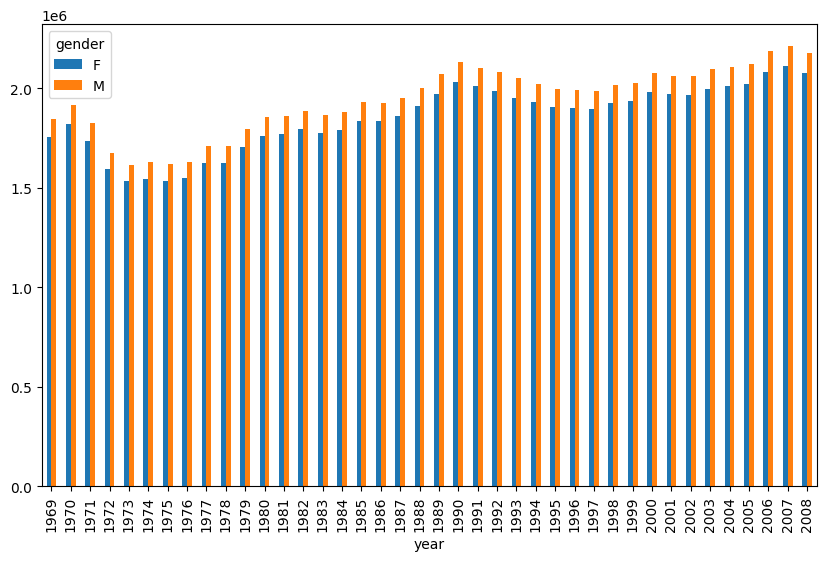

In [13]:
df.plot(kind= 'bar', figsize=(10,6));

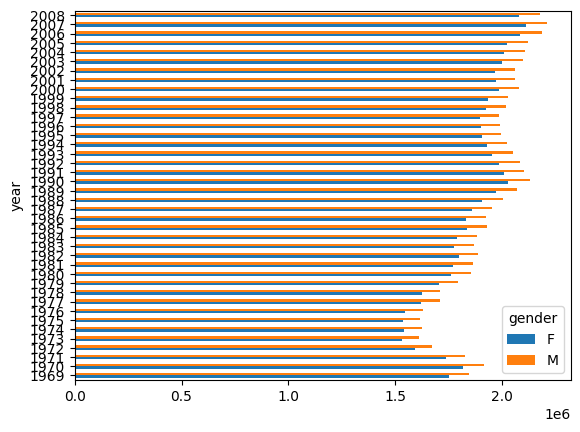

In [16]:
df.plot(kind= 'barh');

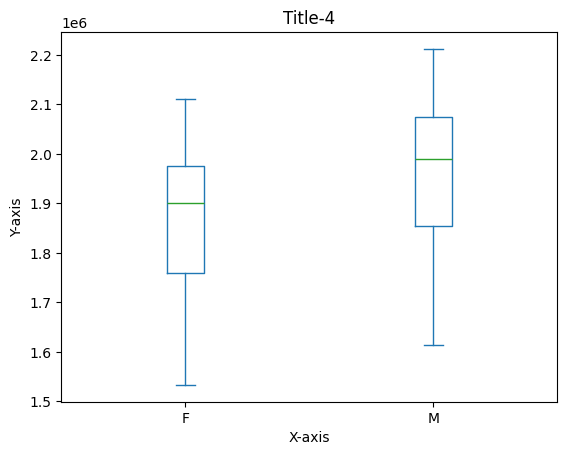

In [17]:
df.plot(kind='box',title='Title-4', xlabel='X-axis', ylabel='Y-axis');

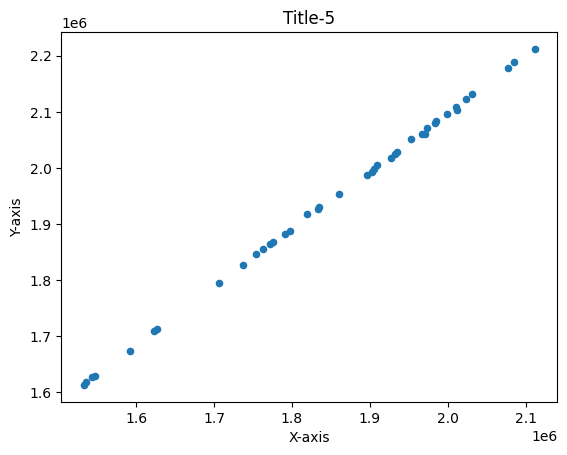

In [18]:
df.plot(kind='scatter', x='F', y='M',title='Title-5', xlabel='X-axis', ylabel='Y-axis');

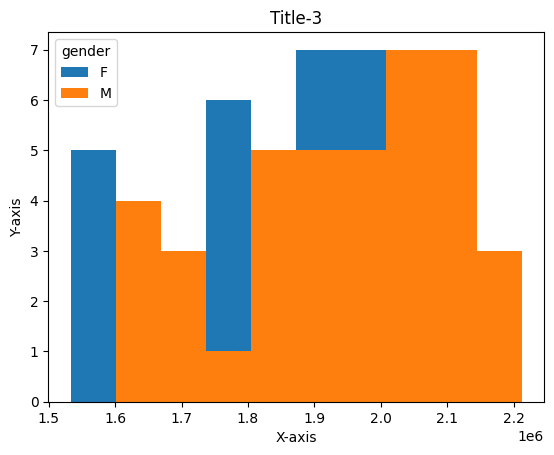

In [19]:
df.plot(kind='hist',title='Title-3', xlabel='X-axis', ylabel='Y-axis');

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.